In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [4]:
df= pd.read_csv('wm.csv')
df.head(2)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106


In [7]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [15]:
df = df.drop_duplicates()

In [17]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [27]:
df['Holiday_Flag'] = df['Holiday_Flag'].astype(int) 

In [5]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Convert invalid dates to NaT
df.dropna(subset=['Date'], inplace=True)  # Remove rows where 'Date' is NaT

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['day_of_week'] = df['Date'].dt.dayofweek


In [9]:
features = ['year', 'month', 'day', 'day_of_week']  # You can add more features
x = df[features]
y = df['Weekly_Sales'] 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [17]:
model= LinearRegression()

In [19]:
model.fit(X_train,y_train)

LinearRegression()

In [21]:
prediction = model.predict(X_test)

In [23]:
mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, prediction)

In [25]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 487971.8437769737
Root Mean Squared Error (RMSE): 572508.7561620737
R² Score: -0.007034442913286698


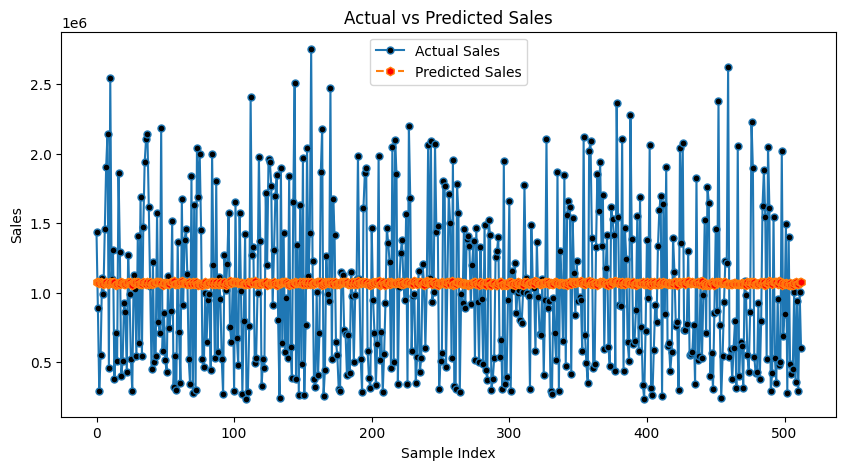

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual Sales", marker='o',markersize=5,markerfacecolor='black')
plt.plot(prediction, label="Predicted Sales", linestyle="dashed", marker='h',markerfacecolor='red')
plt.xlabel("Sample Index")
plt.ylabel("Sales")
plt.title("Actual vs Predicted Sales")
plt.legend()
plt.show()


In [29]:
future_dates = pd.DataFrame({
    'year': [2025, 2025, 2025],
    'month': [3, 4, 5],
    'day': [15, 20, 25],
    'day_of_week': [5, 2, 6]
})

future_sales_pred = model.predict(future_dates)
print("Future Sales Predictions:", future_sales_pred)

Future Sales Predictions: [1035792.70244356 1041030.4648845  1026152.45546262]
